In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import numpy as np

#import warnings
#warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

In [2]:
cos_sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)

In [3]:
mix = sin_sig + cos_sig
mix

In [4]:

wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave

In [9]:
wave.make_audio()

In [11]:
def int_harmonics(freq):
    if (freq>0)&(freq<20000):
        f=freq
        freq_list = []
        while f<20000:
            freq_list.append(f)
            f+=freq
        return freq_list
def odd_harmonics(freq):
    if (freq>0)&(freq<20000):
        f=freq
        freq_list = []
        while f<20000:
            freq_list.append(f)
            f+=2*freq
        return freq_list

In [13]:
def make_sine(offset,freq):
    signal = thinkdsp.SinSignal(freq=freq, offset=offset)
    wave = signal.make_wave(duration=0.5, framerate=10000)
    return wave

In [14]:
def synthesize1(amps, fs, ts):
    components = [thinkdsp.CosSignal(freq, amp)
                  for amp, freq in zip(amps, fs)]
    signal = thinkdsp.SumSignal(*components)

    ys = signal.evaluate(ts)
    return ys

In [15]:
amps = np.array([0.6, 0.25, 0.1, 0.05])
fs = [100, 200, 300, 400]
framerate = 11025

ts = np.linspace(0, 1, framerate)
ys = synthesize1(amps, fs, ts)
wave = thinkdsp.Wave(ys, ts, framerate)
wave.apodize()
wave.make_audio()

In [19]:
import math

In [89]:
import matplotlib.pyplot as plt

In [131]:
def f(x):
    a=0
    #a+=math.exp(-x)
    #a+=1/x
    #a+=1/x**2
    #a+=1/x**3
    #a+=1/x
    a=np.random.rand()*1/x
    return a

In [132]:
def g(x):
    m=0
    m+=math.exp((0-(x-1)**2)/(3**2))
    m+=5*math.exp((0-(x-10)**2)/(6**2))
    return m

In [116]:
def custom_amps1():
    x=np.random.rand(10)
    y=[]
    for i in range(300):
        y=y+[j/(i+1)**2 for j in x]
    return y

In [133]:
amps = [f(x)*g(x) for x in range(1,1000)]
#amps = custom_amps1()
fs = int_harmonics(440)
framerate = 44000

ts = np.linspace(0, 1, framerate)
ys = synthesize1(amps[:len(fs)], fs[:len(amps)], ts)
wave = thinkdsp.Wave(ys, ts, framerate)
wave.apodize()
wave.make_audio()

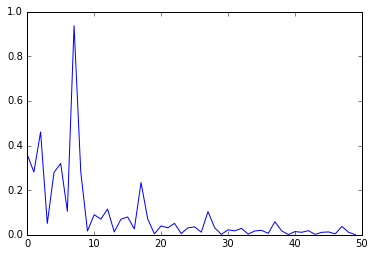

In [124]:
plt.plot(amps[:50])

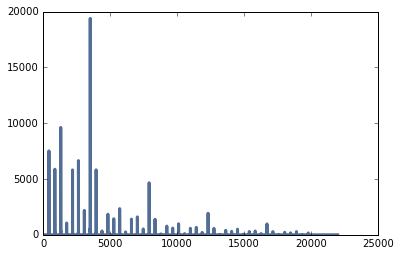

In [125]:
wave.make_spectrum().plot()

In [134]:
import essentia.standard

ImportError: No module named 'essentia'

In [135]:
!pip install essentia

  Could not find a version that satisfies the requirement essentia (from versions: )
No matching distribution found for essentia


In [136]:
!pip install pyfluidsynth

  Running setup.py bdist_wheel for pyfluidsynth: started
  Running setup.py bdist_wheel for pyfluidsynth: finished with status 'done'
  Stored in directory: C:\Users\Luka\AppData\Local\pip\Cache\wheels\f4\8f\b2\674aa0f71816a2892ed60cd1bebba03e6f3f86ec155c28a0c8
Successfully built pyfluidsynth


In [138]:

import time

from fluidsynth import fluidsynth

settings = fluidsynth.FluidSettings()
settings.quality = "low"

synth = fluidsynth.FluidSynth(settings)
synth.load_soundfont("double.sf2")

driver = fluidsynth.FluidAudioDriver(settings, synth)

sequencer = fluidsynth.FluidSequencer()
sequencer.beats_per_minute = 120
beat_length = sequencer.ticks_per_beat

print ("BPM:", sequencer.beats_per_minute)
print ("TPB:", sequencer.ticks_per_beat)
print ("TPS:", sequencer.ticks_per_second)

dest = sequencer.add_synth(synth)

c_scale = []

for note in range(60, 72):
    event = fluidsynth.FluidEvent()
    event.dest = dest[0]
    event.note(0, note, 127, int(beat_length*0.9))
    c_scale.append(event)

ticks = sequencer.ticks + 10

sequencer.send(c_scale[0], ticks)
sequencer.send(c_scale[4], ticks)
sequencer.send(c_scale[7], ticks)

ticks += beat_length

sequencer.send(c_scale[0], ticks)
sequencer.send(c_scale[5], ticks)
sequencer.send(c_scale[9], ticks)

ticks += beat_length

sequencer.send(c_scale[0], ticks)
sequencer.send(c_scale[4], ticks)
sequencer.send(c_scale[7], ticks)

ticks += beat_length

sequencer.send(c_scale[2], ticks)
sequencer.send(c_scale[5], ticks)
sequencer.send(c_scale[7], ticks)
sequencer.send(c_scale[11], ticks)

ticks += beat_length

sequencer.send(c_scale[0], ticks)
sequencer.send(c_scale[4], ticks)
sequencer.send(c_scale[7], ticks)

time.sleep(16)

SyntaxError: invalid syntax (fluidsynth.py, line 36)